In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

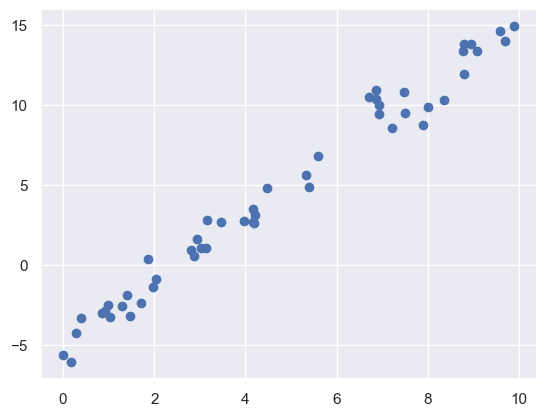

In [2]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

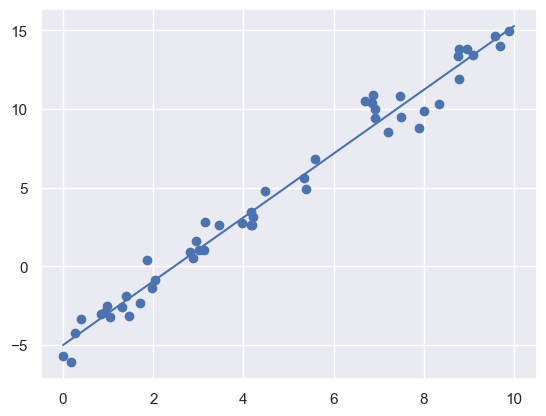

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [4]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.027208810360695
Model intercept: -4.998577085553202


In [5]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000153
[ 1.5 -2.   1. ]


In [6]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [7]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

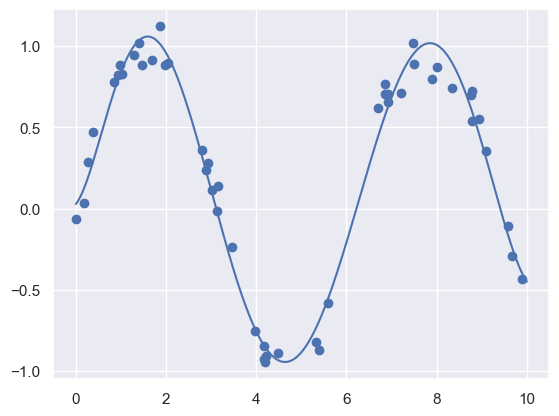

In [8]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

(0.0, 10.0)

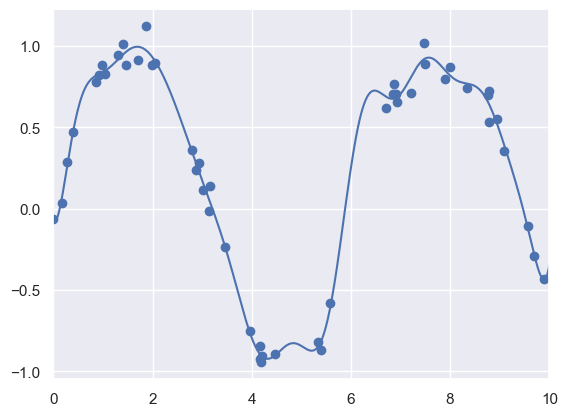

In [10]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor

    def _gauss_basis(self, x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))

    def fit(self, X, y=None):
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self

    def transform(self, X):
        return self._gauss_basis(X[:, np.newaxis], self.centers_, self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(20),
                           LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10)

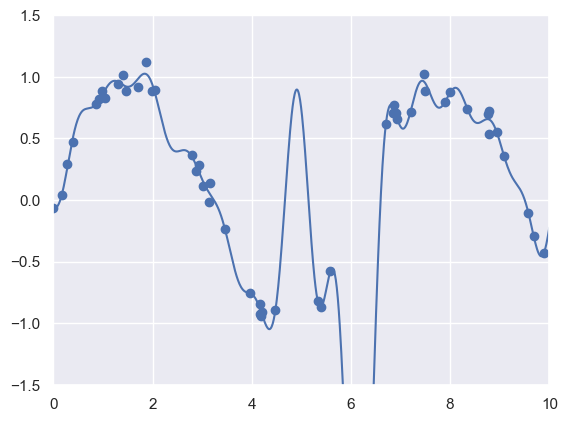

In [11]:
model = make_pipeline(GaussianFeatures(30),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

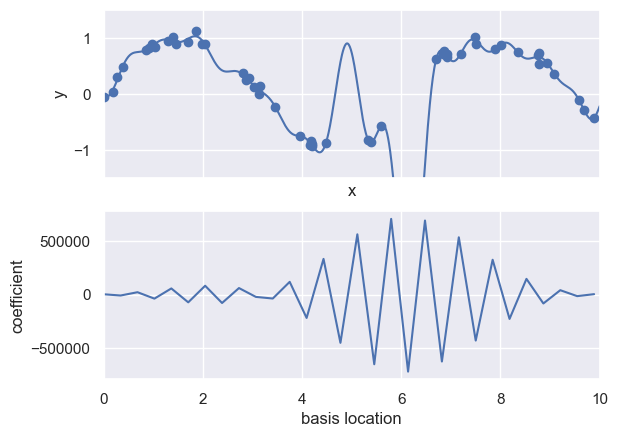

In [12]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))
    
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

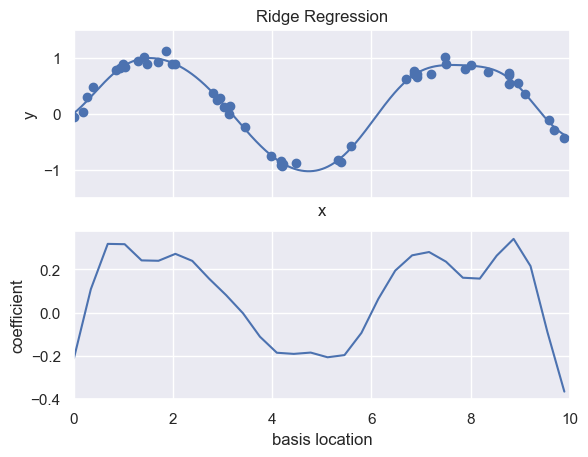

In [13]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

/Users/abbyzhou/github/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.136e-03, tolerance: 2.065e-03
  model = cd_fast.enet_coordinate_descent(


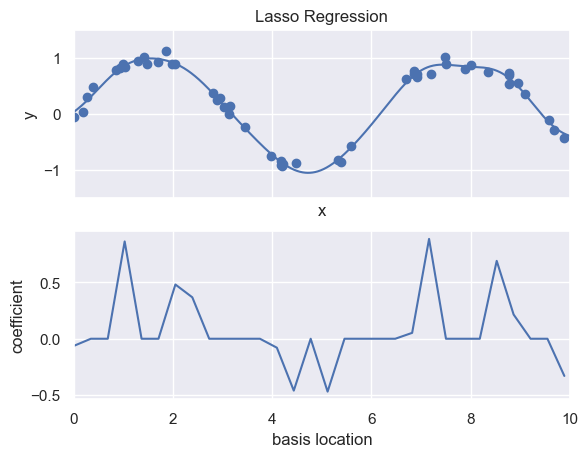

In [14]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')

In [18]:
# !curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD


In [ ]:
import pandas as pd
counts = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('data/BicycleWeather.csv', index_col='DATE', parse_dates=True)

/var/folders/6f/s14ngf096w3ctv98g3j3n_gr0000gn/T/ipykernel_67650/4124418666.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  counts = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)


FileNotFoundError: [Errno 2] No such file or directory: 'data/BicycleWeather.csv'

In [27]:
daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # remove other columns

In [28]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

In [29]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

/var/folders/6f/s14ngf096w3ctv98g3j3n_gr0000gn/T/ipykernel_67650/217070952.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  daily['holiday'].fillna(0, inplace=True)


(8.0, 17.0)

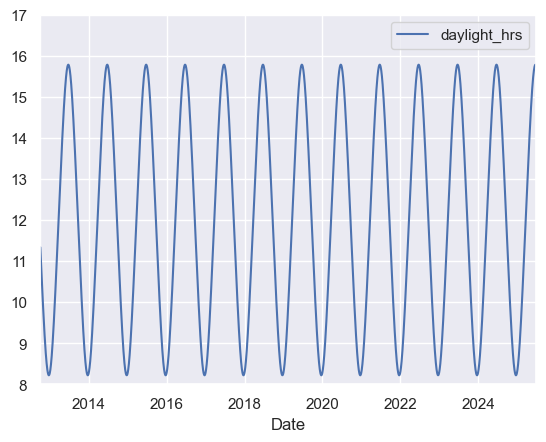

In [31]:
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - pd.Timestamp(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()
plt.ylim(8, 17)

In [32]:
# temperatures are in 1/10 deg C; convert to C
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

# precip is in 1/10 mm; convert to inches
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])

NameError: name 'weather' is not defined

In [33]:
daily['annual'] = (daily.index - daily.index[0]).days / 365.


In [34]:
daily.head()


,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,annual
Date,,,,,,,,,,,
2012-10-02,3876.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11.335681,0.000000
2012-10-03,7042.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.002740
2012-10-04,6950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.005479
2012-10-05,6296.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.008219
2012-10-06,4012.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.010959


In [35]:
# Drop any rows with null values
daily.dropna(axis=0, how='any', inplace=True)

column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
                'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']
X = daily[column_names]
y = daily['Total']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

KeyError: "['PRCP', 'dry day', 'Temp (C)'] not in index"

In [36]:
daily[['Total', 'predicted']].plot(alpha=0.5);


KeyError: "['predicted'] not in index"

2024 Mean Squared Error: 9.212053e+09
2024 Mean Absolute Error: 5.872242e+04


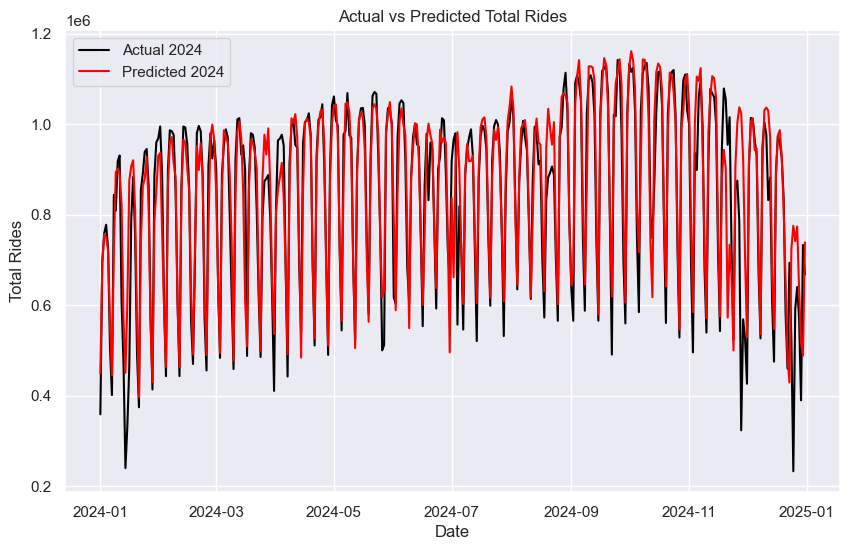

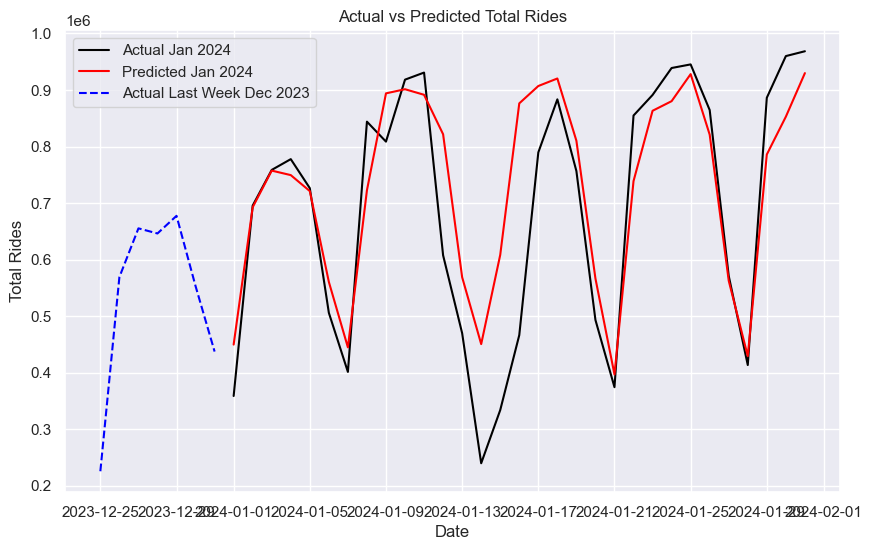

In [40]:
#COMPARISON OF 1 DAY V 7 DAY, LIN REGRESSION

import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import validation_curve
from sklearn.metrics import mean_squared_error

df = pd.read_csv('dailyboardingtotals.csv')
df['service_date'] = pd.to_datetime(df['service_date'])

df = df.sort_values('service_date')
df['prev_day_rides'] = df['total_rides'].shift(1)
df['prev_week_rides'] = df['total_rides'].shift(7)
df['one_year_ago_rides'] = df['total_rides'].shift(364)


#data split
df2023 = df[df['service_date'].dt.year == 2023].dropna()
df2024 = df[df['service_date'].dt.year == 2024].dropna()

model = make_pipeline(LinearRegression())
X_train = df2023[['prev_day_rides', 'prev_week_rides', 'one_year_ago_rides']].values
y_train = df2023['total_rides'].values
X_test = df2024[['prev_day_rides', 'prev_week_rides', 'one_year_ago_rides']].values
y_test = df2024['total_rides'].values

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = np.mean(np.abs(y_test - y_pred))
print(f"2024 Mean Squared Error: {mse:e}")
print(f"2024 Mean Absolute Error: {mae:e}")

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(df2024['service_date'], y_test, label='Actual 2024', color='black')
plt.plot(df2024['service_date'], y_pred, label='Predicted 2024', color='red')
plt.xlabel('Date')
plt.ylabel('Total Rides')
plt.title('Actual vs Predicted Total Rides')
plt.legend()


# Plot predicted vs actual for January 2024
plt.figure(figsize=(10,6))
plt.plot(df2024[df2024['service_date'].dt.month == 1]['service_date'],
         y_test[df2024['service_date'].dt.month == 1],
         label='Actual Jan 2024', color='black')
plt.plot(df2024[df2024['service_date'].dt.month == 1]['service_date'],
         y_pred[df2024['service_date'].dt.month == 1],
         label='Predicted Jan 2024', color='red')

# Add actual data from last week of December 2023
last_week_dec = (df2023['service_date'] >= pd.Timestamp('2023-12-25')) & (df2023['service_date'] <= pd.Timestamp('2023-12-31'))
plt.plot(df2023['service_date'][last_week_dec],
         y_train[last_week_dec],
         label='Actual Last Week Dec 2023', color='blue', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Total Rides')
plt.title('Actual vs Predicted Total Rides')
plt.legend()


2024 Mean Squared Error: 9.212053e+09
2024 Mean Absolute Error: 5.872242e+04


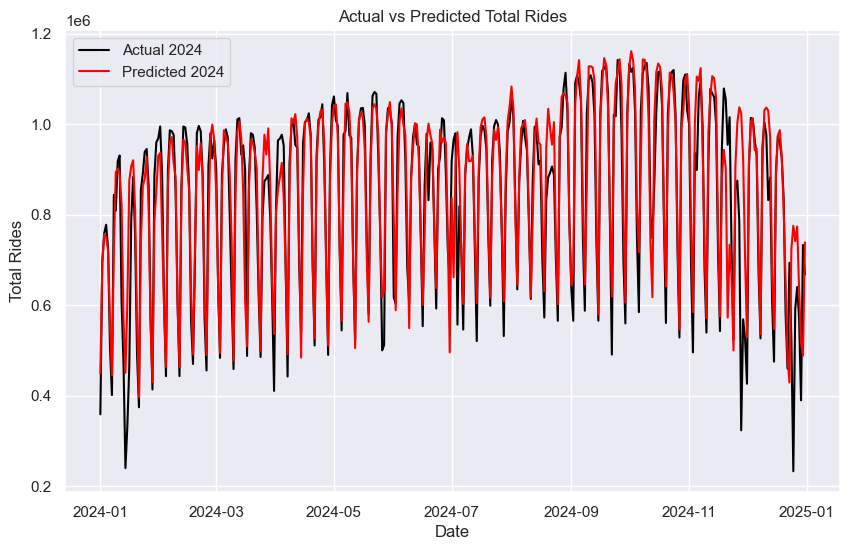

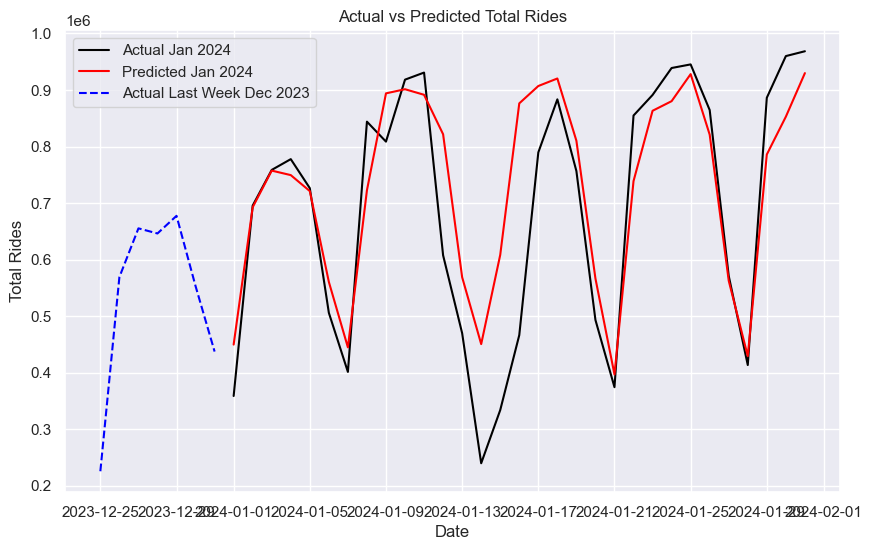

In [73]:
#COMPARISON OF 1 DAY V 7 DAY, RIDGE REGRESSION

import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import validation_curve
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge

df = pd.read_csv('dailyboardingtotals.csv')
df['service_date'] = pd.to_datetime(df['service_date'])

df = df.sort_values('service_date')
df['prev_day_rides'] = df['total_rides'].shift(1)
df['prev_week_rides'] = df['total_rides'].shift(7)
df['one_year_ago_rides'] = df['total_rides'].shift(364)


#data split
df2023 = df[df['service_date'].dt.year == 2023].dropna()
df2024 = df[df['service_date'].dt.year == 2024].dropna()

model = make_pipeline(Ridge(alpha=0.1))
X_train = df2023[['prev_day_rides', 'prev_week_rides', 'one_year_ago_rides']].values
y_train = df2023['total_rides'].values
X_test = df2024[['prev_day_rides', 'prev_week_rides', 'one_year_ago_rides']].values
y_test = df2024['total_rides'].values

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = np.mean(np.abs(y_test - y_pred))
print(f"2024 Mean Squared Error: {mse:e}")
print(f"2024 Mean Absolute Error: {mae:e}")

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(df2024['service_date'], y_test, label='Actual 2024', color='black')
plt.plot(df2024['service_date'], y_pred, label='Predicted 2024', color='red')
plt.xlabel('Date')
plt.ylabel('Total Rides')
plt.title('Actual vs Predicted Total Rides')
plt.legend()


# Plot predicted vs actual for January 2024
plt.figure(figsize=(10,6))
plt.plot(df2024[df2024['service_date'].dt.month == 1]['service_date'],
         y_test[df2024['service_date'].dt.month == 1],
         label='Actual Jan 2024', color='black')
plt.plot(df2024[df2024['service_date'].dt.month == 1]['service_date'],
         y_pred[df2024['service_date'].dt.month == 1],
         label='Predicted Jan 2024', color='red')

# Add actual data from last week of December 2023
last_week_dec = (df2023['service_date'] >= pd.Timestamp('2023-12-25')) & (df2023['service_date'] <= pd.Timestamp('2023-12-31'))
plt.plot(df2023['service_date'][last_week_dec],
         y_train[last_week_dec],
         label='Actual Last Week Dec 2023', color='blue', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Total Rides')
plt.title('Actual vs Predicted Total Rides')
plt.legend()


2024 Mean Squared Error: 1.337201e-20
2024 Mean Absolute Error: 9.335491e-11


/var/folders/6f/s14ngf096w3ctv98g3j3n_gr0000gn/T/ipykernel_67650/3607573101.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  daily['holiday'].fillna(0, inplace=True)


,total_rides,prev_day_rides,prev_week_rides,one_year_ago_rides,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,PRCP_mm,Temp (C),dry day,annual,predicted
service_date,,,,,,,,,,,,,,,,,
2022-08-26,843625.0,858470.0,806322.0,713692.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0000,22.638889,1.0,21.663014,NaN
2022-08-27,562693.0,843625.0,539769.0,523217.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0000,22.444444,1.0,21.665753,NaN
2022-08-28,408553.0,562693.0,456881.0,395523.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.9812,26.805556,0.0,21.668493,NaN
2022-08-29,761214.0,408553.0,806958.0,735440.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.3312,25.916667,0.0,21.671233,NaN
2022-08-30,891765.0,761214.0,880215.0,752396.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.2352,23.500000,0.0,21.673973,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-19,366249.0,588825.0,410932.0,374316.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0000,-12.416667,1.0,24.065753,NaN
2025-01-20,420728.0,366249.0,863414.0,854857.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0000,-14.666667,1.0,24.068493,NaN
2025-01-21,503796.0,420728.0,917760.0,891249.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,-19.111111,1.0,24.071233,NaN


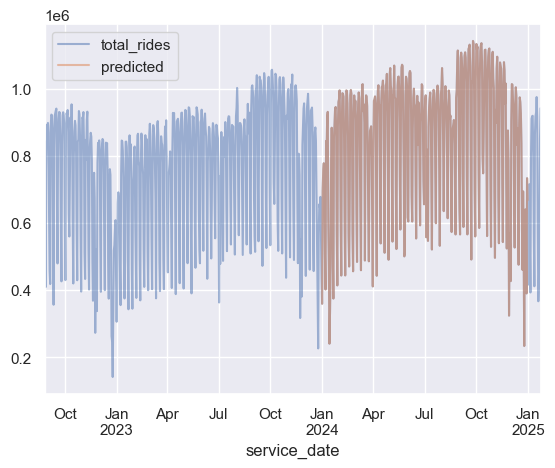

In [121]:
weather = pd.read_csv('chicagoweather.csv', index_col='datetime', parse_dates=True)

df = pd.read_csv('dailyboardingtotals.csv')
df['service_date'] = pd.to_datetime(df['service_date'])

df = df.set_index('service_date')
df = df.sort_index()


df['prev_day_rides'] = df['total_rides'].shift(1)
df['prev_week_rides'] = df['total_rides'].shift(7)
df['one_year_ago_rides'] = df['total_rides'].shift(364)

df2023 = df[df.index.year == 2023].dropna()
df2024 = df[df.index.year == 2024].dropna()

# Select relevant numeric columns
numeric_df = df[['total_rides', 'prev_day_rides', 'prev_week_rides', 'one_year_ago_rides']]

# Resample to daily frequency
daily = numeric_df.resample('d').mean()

days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays(daily.index.min(), daily.index.max())
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

# Weather features
weather['TMIN_C'] = (weather['tempmin'] - 32) * 5.0/9.0
weather['TMAX_C'] = (weather['tempmax'] - 32) * 5.0/9.0
weather['Temp (C)'] = 0.5 * (weather['TMIN_C'] + weather['TMAX_C'])
weather['PRCP_mm'] = weather['precip'] * 25.4
weather['dry day'] = (weather['PRCP_mm'] == 0).astype(int)

daily = daily.join(weather[['PRCP_mm', 'Temp (C)', 'dry day']])

daily['annual'] = (daily.index - daily.index[0]).days / 365.

daily.dropna(axis=0, how='any', inplace=True)

column_names = ['total_rides', 'prev_day_rides', 'prev_week_rides', 'one_year_ago_rides',
                'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
                'PRCP_mm', 'dry day', 'Temp (C)', 'annual']

# Split into train (2023) and test (2024) using daily dataframe
X_train = daily.loc[daily.index.year == 2023, column_names].values
y_train = daily.loc[daily.index.year == 2023, 'total_rides'].values
X_test = daily.loc[daily.index.year == 2024, column_names].values
y_test = daily.loc[daily.index.year == 2024, 'total_rides'].values

model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
daily.loc[daily.index.year == 2024, 'predicted'] = model.predict(X_test)

daily[['total_rides', 'predicted']].plot(alpha=0.5);

mse = mean_squared_error(y_test, daily.loc[daily.index.year == 2024, 'predicted'].values)
mae = np.mean(np.abs(y_test - daily.loc[daily.index.year == 2024, 'predicted'].values))
print(f"2024 Mean Squared Error: {mse:e}")
print(f"2024 Mean Absolute Error: {mae:e}")

daily

In [120]:
X_test[0], X_train[0]

(array([ 3.58731000e+05,  4.37348000e+05,  2.25639000e+05,  4.19921000e+05,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  1.00000000e+00, -6.38888889e-01,  2.30136986e+01]),
 array([3.05265000e+05, 4.38529000e+05, 1.40554000e+05, 2.55170000e+05,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        2.92100000e+00, 0.00000000e+00, 4.80555556e+00, 2.20136986e+01]))

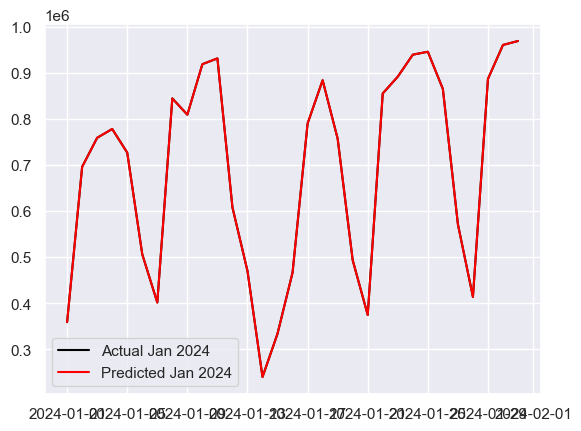

In [116]:
plt.plot(daily.loc[(daily.index.year == 2024) & (daily.index.month == 1), 'total_rides'].index,
         daily.loc[(daily.index.year == 2024) & (daily.index.month == 1), 'total_rides'],
         label='Actual Jan 2024', color='black')

plt.plot(daily.loc[(daily.index.year == 2024) & (daily.index.month == 1), 'total_rides'].index,
         daily.loc[(daily.index.year == 2024) & (daily.index.month == 1), 'predicted'],
         label='Predicted Jan 2024', color='red')

plt.legend()


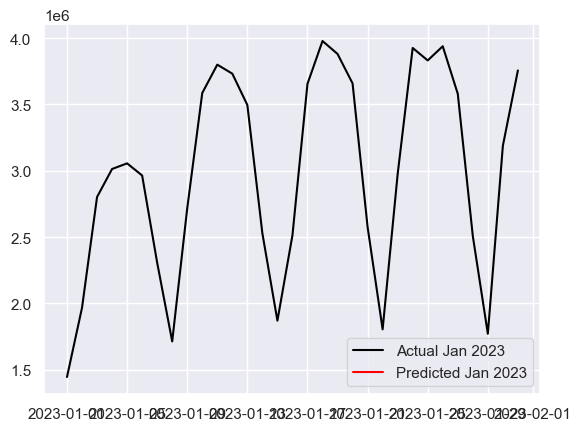

In [95]:
plt.plot(daily.loc[(daily.index.year == 2023) & (daily.index.month == 1), 'Total'].index,
         daily.loc[(daily.index.year == 2023) & (daily.index.month == 1), 'Total'],
         label='Actual Jan 2023', color='black')

plt.plot(daily.loc[(daily.index.year == 2023) & (daily.index.month == 1), 'Total'].index,
         daily.loc[(daily.index.year == 2023) & (daily.index.month == 1), 'predicted'],
         label='Predicted Jan 2023', color='red')

plt.legend()
